In [5]:
# =======================================
# DeepRacer Simple Log Visualization
# =======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path
import glob
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

In [6]:
# --- Load CSV and track .npy file---
# replace main_dir with github repo directory
main_dir = "."
track_dir = "tracks"
eval_log_dir = os.path.join(main_dir, "eval_log/")
training_log_dir = os.path.join(main_dir, "training_log/")
#data from csv
df = pd.read_csv(os.path.join(eval_log_dir, "optimized_clone/sim-trace/evaluation/20250907203941-Rt2xFlg-RjizDD3bG9iJdw/evaluation-simtrace/0-iteration.csv"))

#track waypoints
track_file = os.path.join(main_dir, track_dir, "2024_reinvent_champ_ccw.npy")

In [7]:
ideal_data = np.array([[ 3.4882,  1.424 ,  2.1187],
				[ 3.2859,  1.4498,  2.196 ],
				[ 3.0778,  1.4676,  2.2593],
				[ 2.8556,  1.4806,  2.3101],
				[ 2.5985,  1.4918,  2.3499],
				[ 2.3217,  1.5002,  2.3797],
				[ 2.0395,  1.5056,  2.4   ],
				[ 1.7537,  1.5085,  2.4   ],
				[ 1.4654,  1.5092,  2.4   ],
				[ 1.175 ,  1.5082,  2.4   ],
				[ 0.8828,  1.5057,  2.4   ],
				[ 0.589 ,  1.5022,  2.4   ],
				[ 0.2938,  1.4978,  2.4   ],
				[-0.0025,  1.4928,  2.4   ],
				[-0.3053,  1.488 ,  2.4   ],
				[-0.6081,  1.4839,  2.4   ],
				[-0.911 ,  1.4804,  2.4   ],
				[-1.2139,  1.4779,  2.4   ],
				[-1.5169,  1.4765,  2.4   ],
				[-1.8199,  1.4766,  2.3943],
				[-2.1228,  1.4784,  2.3681],
				[-2.4255,  1.4825,  2.3203],
				[-2.7278,  1.4894,  2.2491],
				[-3.0296,  1.4998,  2.1537],
				[-3.3307,  1.515 ,  2.0659],
				[-3.6086,  1.5199,  1.9841],
				[-3.8717,  1.5027,  1.8739],
				[-4.1157,  1.4519,  1.6169],
				[-4.3378,  1.3589,  1.3504],
				[-4.5278,  1.2091,  1.4347],
				[-4.6815,  1.0101,  1.5005],
				[-4.7891,  0.7725,  1.5623],
				[-4.8433,  0.5167,  1.5391],
				[-4.8442,  0.2608,  1.5544],
				[-4.7976,  0.0156,  1.6068],
				[-4.7057, -0.2119,  1.54  ],
				[-4.5682, -0.4149,  1.4421],
				[-4.381 , -0.5828,  1.6196],
				[-4.1621, -0.724 ,  1.7848],
				[-3.9171, -0.8406,  1.942 ],
				[-3.6514, -0.9364,  2.0221],
				[-3.3663, -1.0146,  2.1003],
				[-3.0718, -1.0759,  2.1874],
				[-2.7759, -1.122 ,  2.2584],
				[-2.4795, -1.1551,  2.3143],
				[-2.1835, -1.1776,  2.3559],
				[-1.8892, -1.1908,  2.3838],
				[-1.5978, -1.1961,  2.3983],
				[-1.3093, -1.1947,  2.4   ],
				[-1.0235, -1.1876,  2.4   ],
				[-0.7402, -1.1756,  2.4   ],
				[-0.459 , -1.1591,  2.4   ],
				[-0.1799, -1.1384,  2.4   ],
				[ 0.0973, -1.1133,  2.4   ],
				[ 0.3724, -1.0834,  2.4   ],
				[ 0.6464, -1.0505,  2.3965],
				[ 0.9141, -1.0154,  2.3857],
				[ 1.1816, -0.9848,  2.3857],
				[ 1.4483, -0.9634,  2.3857],
				[ 1.7137, -0.9558,  2.3857],
				[ 1.9771, -0.9671,  2.3613],
				[ 2.2372, -1.0034,  2.2814],
				[ 2.493 , -1.0666,  2.3201],
				[ 2.7462, -1.1441,  2.2556],
				[ 2.9973, -1.2325,  2.1699],
				[ 3.2481, -1.3307,  2.0682],
				[ 3.4995, -1.4135,  1.9562],
				[ 3.7507, -1.4718,  1.8706],
				[ 3.9996, -1.4961,  1.6905],
				[ 4.2411, -1.477 ,  1.4575],
				[ 4.4662, -1.4051,  1.2819],
				[ 4.6593, -1.2723,  1.1287],
				[ 4.7926, -1.0708,  1.3401],
				[ 4.8845, -0.8359,  1.5299],
				[ 4.936 , -0.574 ,  1.6572],
				[ 4.9483, -0.2908,  1.6788],
				[ 4.9216,  0.0057,  1.7031],
				[ 4.8568,  0.2847,  1.7555],
				[ 4.7602,  0.5381,  1.801 ],
				[ 4.6357,  0.7654,  1.8268],
				[ 4.4837,  0.9627,  1.6951],
				[ 4.3055,  1.1254,  1.5492],
				[ 4.105 ,  1.245 ,  1.7042],
				[ 3.8971,  1.3285,  1.8407],
				[ 3.6909,  1.3856,  1.9622],
				[ 3.4882,  1.424 ,  2.0546],
				[ 3.4882,  1.424 ,  2.1187]])


In [8]:
def get_distance_from_ideal_line(x, y, ideal_point_1, ideal_point_2):
	"""Calculates the distance from the ideal line defined by ideal_line."""
	vector_ideal = np.array(ideal_point_2) - np.array(ideal_point_1)
	vector_car = np.array([x, y]) - np.array(ideal_point_1)
	if np.linalg.norm(vector_ideal) < 1e-6:
		distance = np.linalg.norm(vector_car)
	else:
		dot_product = np.dot(vector_car, vector_ideal)
		parallel_point = np.array(ideal_point_1) + (dot_product / np.dot(vector_ideal, vector_ideal)) * vector_ideal
		distance = np.linalg.norm(np.array([x, y]) - parallel_point)
	return distance

In [9]:
def dist_from_ideal(x, y, cur_idx):
	vector_car = np.array([x, y]) - ideal_data[cur_idx, :2]
	next_idx = (cur_idx + 1) % 97
	vector_heading = ideal_data[next_idx, :2] - ideal_data[cur_idx, :2]
	if (np.dot(vector_car, vector_heading)) < 0:
		next_idx = cur_idx
		cur_idx = (next_idx - 1) % 97
	return get_distance_from_ideal_line(x, y, ideal_data[cur_idx, :2], ideal_data[next_idx, :2])



In [10]:
ideal_point_1 = np.array([0, 0]);

vector_ideal = np.array([4, 0]);
vector_car = np.array([np.cos(np.pi/3), np.sin(np.pi/3)]) * 3
dot_product = np.dot(vector_car, vector_ideal)
parallel_point = np.array(ideal_point_1) + (dot_product / np.dot(vector_ideal, vector_ideal)) * vector_ideal
parallel_point

array([1.5, 0. ])

In [11]:
distances = [dist_from_ideal(df['X'][i], df['Y'][i], df['closest_waypoint'][i]) for i in range(df.shape[0])]

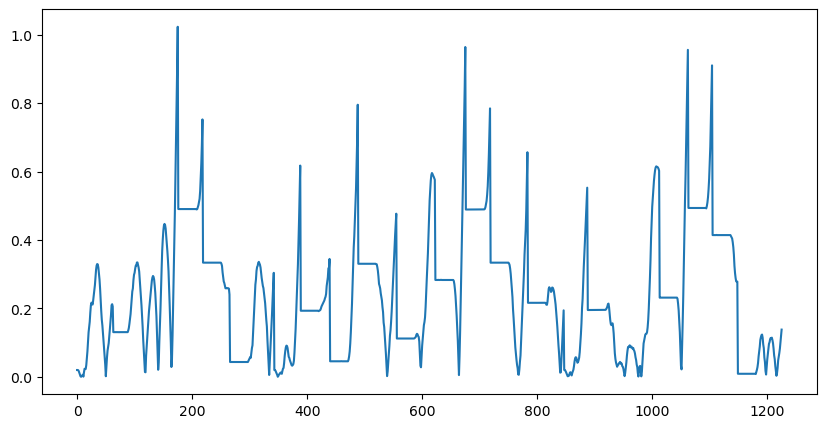

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(distances)


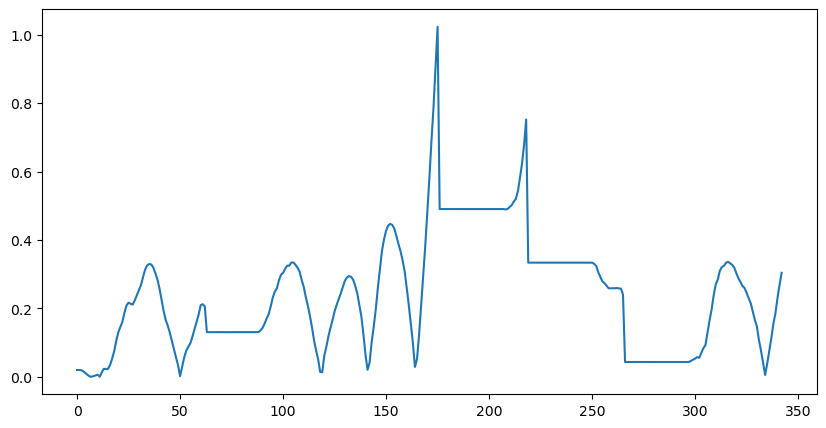

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(distances[:sum(df['episode'] == 0)])


In [14]:
##Parameters
#----------
#waypoints : np.ndarray
#	Array of waypoints with shape (N, 6) → [x_center, y_center, x_left, y_left, x_right, y_right]

waypoints = np.load(track_file, allow_pickle=True)

center_line = ideal_data[:-1]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)

df["speed"] = df["throttle"]  # If throttle directly maps to speed (adjust if you have actual m/s)
# If throttle is gear-like instead of real m/s, you might need: df["speed"] = df["throttle"] * speed_scale
df["episode"] = df["episode"].astype(int)
#print("Is loop/ring? ", l_center_line.is_ring)

In [15]:
# Visualize a DeepRacer track from an .npy file.
def plot_track(center_line, inner_border, outer_border, show_wp_index=False, show_center_line=False):
	xs, ys = center_line[:, 0], center_line[:, 1]
	left_line = inner_border
	right_line = outer_border

	# Plot
	fig, ax = plt.subplots(figsize=(10, 5))

	ax.plot(left_line[:, 0], left_line[:, 1], 'k--', label="Left Border")
	ax.plot(right_line[:, 0], right_line[:, 1], 'k--', label="Right Border")
	if show_wp_index == True:
		for i in range(0, len(center_line)):
			plt.text(xs[i] - 0.05, ys[i] + 0.1, f"{i}", fontsize=7, color="green")
	if show_center_line == True:
		ax.scatter(xs, ys, s=10, c="green", label="Waypoints")
	ax.axis("equal")
	return fig, ax

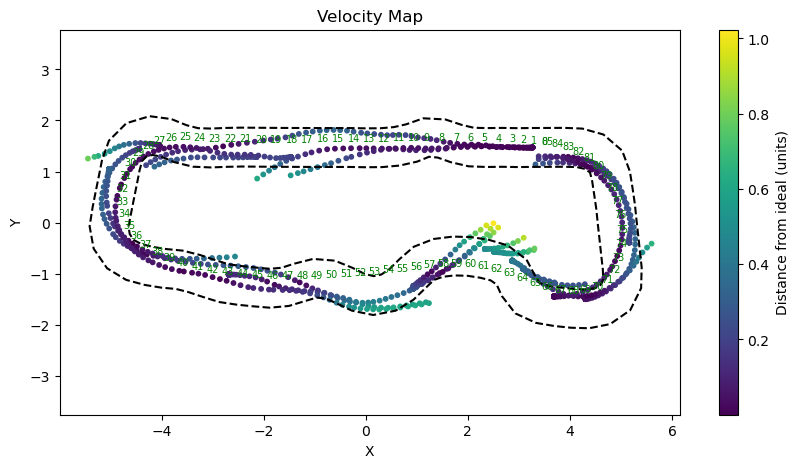

In [16]:
fig, ax = plot_track(center_line, inner_border, outer_border, True, False)
sc = ax.scatter(df["X"], df["Y"], c=distances, cmap="viridis", s=10)
fig.colorbar(sc, label="Distance from ideal (units)")
plt.title("Velocity Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [17]:
training_data_dir = os.path.join(main_dir, "training_log/optimized_clone/sim-trace/training/training-simtrace/")
#data from csv
all_files = glob.glob(os.path.join(training_data_dir, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

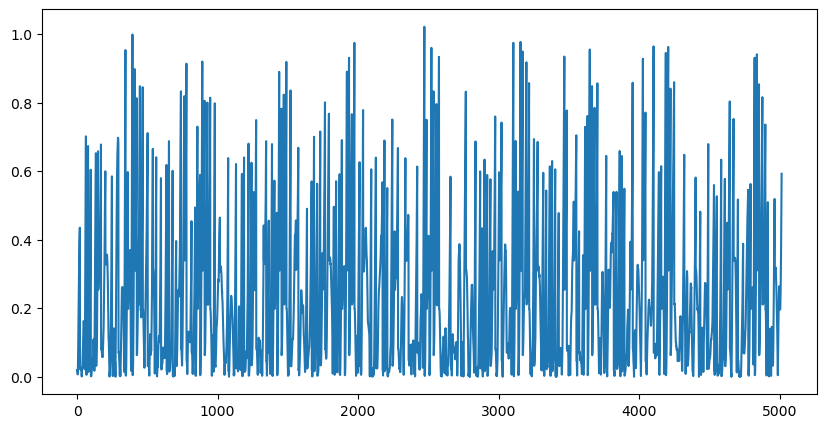

In [18]:
distances = [dist_from_ideal(df['X'][i], df['Y'][i], df['closest_waypoint'][i]) for i in range(df.shape[0])]
plt.figure(figsize=(10, 5))
plt.plot(distances)

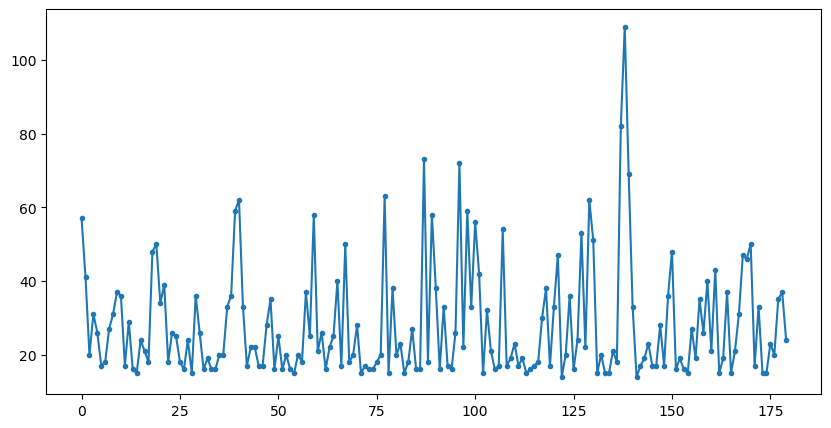

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df['episode'].value_counts().sort_index(), marker=".")


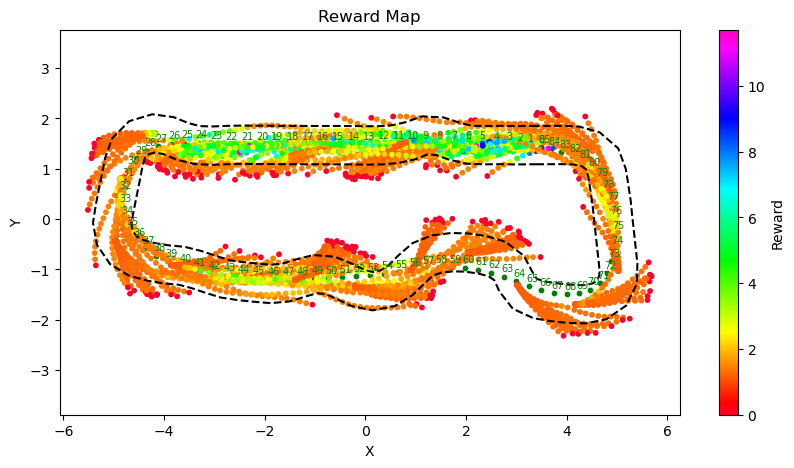

In [20]:
fig, ax = plot_track(center_line, inner_border, outer_border, True, True)
sc = ax.scatter(df["X"], df["Y"], c=df["reward"], cmap="gist_rainbow", s=10)
fig.colorbar(sc, label="Reward")
plt.title("Reward Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

In [21]:
df.head()

,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration,obstacle_crash_counter
0,160,1.0,3.268165,1.471115,-179.761437,12.5,1.8,13,0.000000,False,True,0.558222,1,25.106791,476.169,prepare,0.0,0
1,160,2.0,3.268316,1.471205,-179.768483,5.0,2.1,8,5.241614,False,True,0.557617,1,25.106791,476.227,in_progress,0.0,0
2,160,3.0,3.261892,1.470716,-179.608748,0.0,2.0,6,5.793932,False,True,0.583225,1,25.106791,476.299,in_progress,0.0,0
3,160,4.0,3.237885,1.471156,-179.733567,15.0,1.6,16,2.999579,False,True,0.678819,1,25.106791,476.365,in_progress,0.0,0
4,160,5.0,3.199790,1.464589,-178.249748,0.0,2.4,3,6.566464,False,True,0.830819,2,25.106791,476.438,in_progress,0.0,0


In [22]:
head1 = ideal_data[1:-1, [0, 1]] - ideal_data[0:-2, [0, 1]]
head1 = head1.T / np.linalg.norm(head1.T, axis=0)
head1 = head1.T
head2 = ideal_data[2:, [0, 1]] - ideal_data[0:-2, [0, 1]]
head2 = head2.T / np.linalg.norm(head2.T, axis=0)
head2 = head2.T

/var/folders/hy/b1d9pwmn411brfttg9385mq40000gn/T/ipykernel_28191/4148361867.py:3: RuntimeWarning: invalid value encountered in arccos
  plt.plot(np.arccos(tmp)/np.pi*180, marker=".")


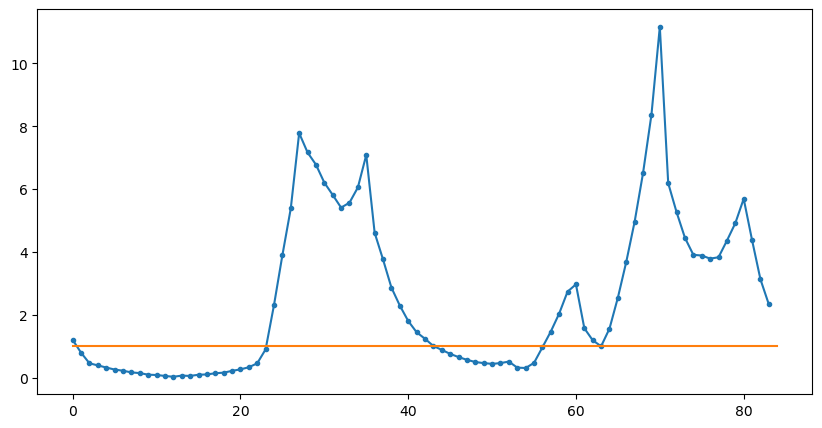

In [23]:
tmp = [np.dot(head1[i, :], head2[i, :]) for i in range(85)]
plt.figure(figsize=(10, 5))
plt.plot(np.arccos(tmp)/np.pi*180, marker=".")
plt.plot(np.repeat(1, 85))

[np.float64(1.1287), np.float64(2.4)]

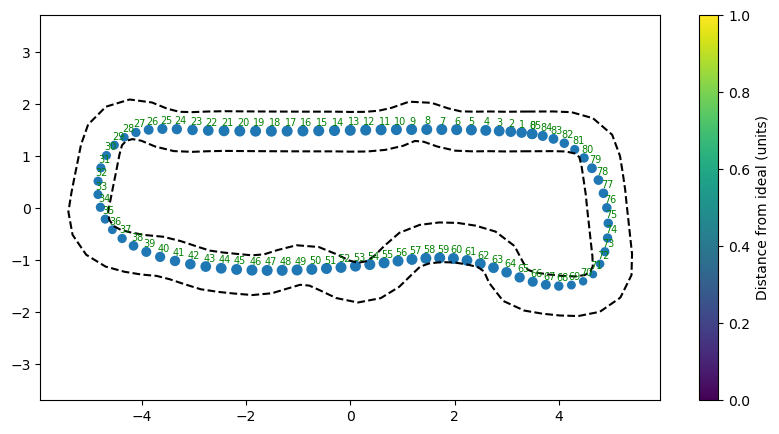

In [83]:
fig, ax = plot_track(center_line, inner_border, outer_border, True, False)
sc = ax.scatter(ideal_data[:,0], ideal_data[:,1], s=20*ideal_data[:,2])
fig.colorbar(sc, label="Distance from ideal (units)")
[ideal_data[:,2].min(), ideal_data[:,2].max()]

In [25]:
import math

def compute_direction(next_point, prev_point):
	x_prev, y_prev = prev_point[0], prev_point[1]
	x_next, y_next = next_point[0], next_point[1]
	return (math.degrees(math.atan2(y_next - y_prev, x_next - x_prev)))

def	get_angle_diff_lookahead(ideal_line, params, n_lookahead):
	closest_idx = params['closest_waypoints'][1]
	ahead_idx = (closest_idx + n_lookahead) % len(params["waypoints"])

	angle_ahead = compute_direction(ideal_line[ahead_idx], ideal_line[closest_idx])
	angle_ahead = (angle_ahead + 180.0) % 360.0 - 180.0

	angle_adj = compute_direction(ideal_line[closest_idx + 1], ideal_line[closest_idx])
	angle_adj = (angle_adj + 180.0) % 360.0 - 180.0
	angle_diff = angle_ahead - angle_adj

	return ((angle_diff + 180.0) % 360.0 - 180.0)

In [26]:
diff = []
params = dict()
params['waypoints'] = ideal_data
for i in range(85):
	params["closest_waypoints"] = [0, i]
	diff.append(get_angle_diff_lookahead(ideal_data, params, 2))

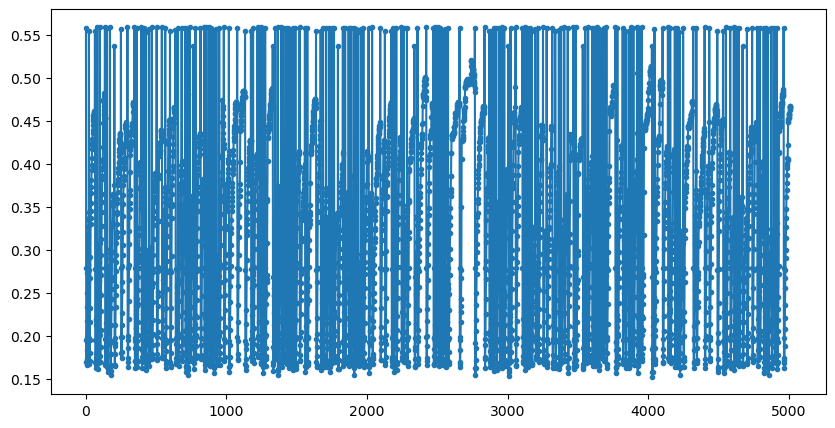

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(df['progress']/df['steps'], marker=".")


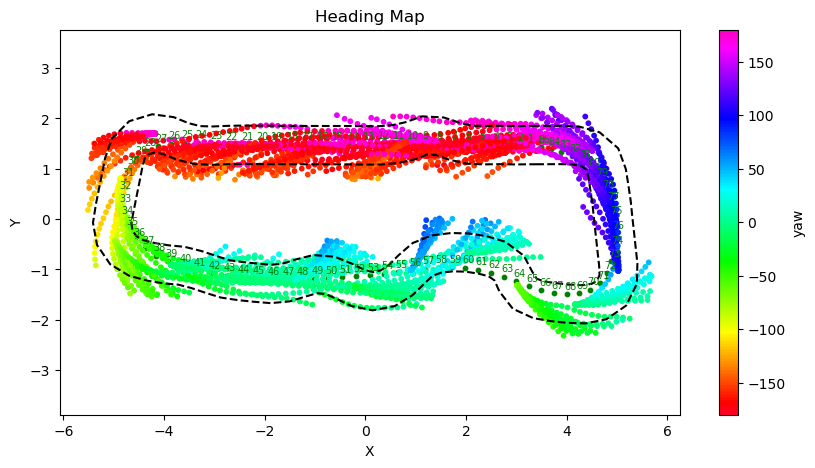

In [28]:
fig, ax = plot_track(center_line, inner_border, outer_border, True, True)
sc = ax.scatter(df["X"], df["Y"], c=df["yaw"], cmap="gist_rainbow", s=10)
fig.colorbar(sc, label="yaw")
plt.title("Heading Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

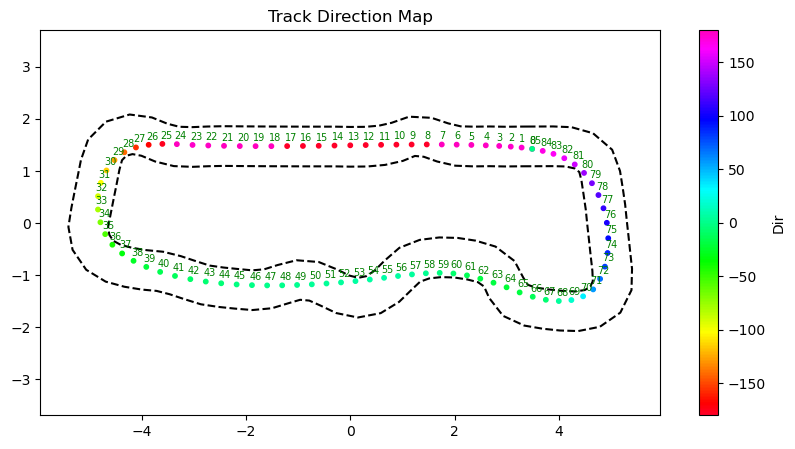

In [29]:
track_dir = []
for i in range(86):
	track_dir.append(compute_direction(ideal_data[i + 1, :2], ideal_data[i, :2]))

fig, ax = plot_track(center_line, inner_border, outer_border, True, False)
sc = ax.scatter(ideal_data[:-1,0], ideal_data[:-1,1], c=track_dir, cmap="gist_rainbow", s=10)
fig.colorbar(sc, label="Dir")
plt.title("Track Direction Map")
plt.axis("equal")
plt.show()

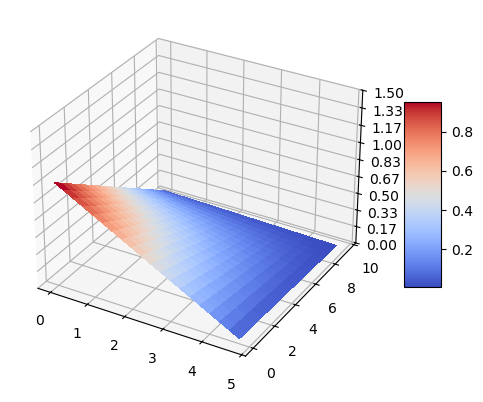

In [44]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
distance_from_ideal = np.arange(0, 5, 0.25)
direction_diff = np.arange(0, 10, 0.5)
distance_from_ideal, direction_diff = np.meshgrid(distance_from_ideal, direction_diff)

reward = 1
distance_factor = 1 - 2 * distance_from_ideal / 10
reward *= distance_factor
heading_factor = 1 - (direction_diff / 10)
reward *= heading_factor

# Plot the surface.
surf = ax.plot_surface(distance_from_ideal, direction_diff, reward, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.5)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


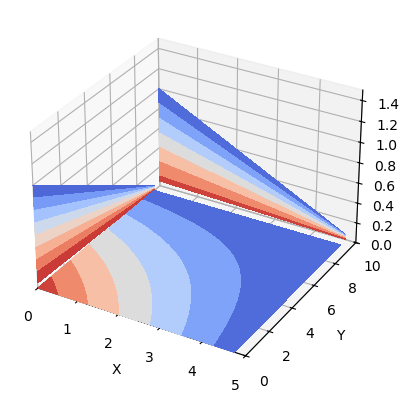

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
#ax.plot_surface(distance_from_ideal, direction_diff, reward, edgecolor='black', lw=0.5, rstride=2, cstride=2,
#                alpha=0.3)

ax.contourf(distance_from_ideal, direction_diff, reward, zdir='z', offset=0, cmap='coolwarm')
ax.contourf(distance_from_ideal, direction_diff, reward, zdir='x', offset=0, cmap='coolwarm')
ax.contourf(distance_from_ideal, direction_diff, reward, zdir='y', offset=10, cmap='coolwarm')

ax.set(xlim=(0, 5), ylim=(0, 10), zlim=(0, 1.5),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


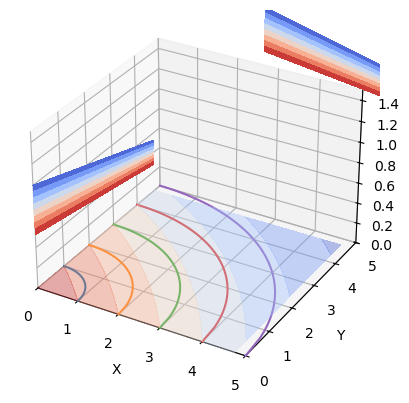

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Make data.
distance_from_ideal = np.arange(0, 5, 0.25)
direction_diff = np.arange(0, 5, 0.25)
distance_from_ideal, direction_diff = np.meshgrid(distance_from_ideal, direction_diff)

reward = 1
distance_factor = 1 - distance_from_ideal / 10
reward *= distance_factor
heading_factor = 1 - (direction_diff / 10)
reward *= heading_factor

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.contourf(distance_from_ideal, direction_diff, reward, zdir='z', offset=0, cmap='coolwarm', alpha=0.4)
ax.contourf(distance_from_ideal, direction_diff, reward, zdir='x', offset=0, cmap='coolwarm')
ax.contourf(distance_from_ideal, direction_diff, reward, zdir='y', offset=10, cmap='coolwarm')

# Plot a circle using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)
ax.plot(x, y, zs=0, zdir='z')
x = np.linspace(0, 2, 100)
y = np.sqrt(4 - x**2)
ax.plot(x, y, zs=0, zdir='z')
x = np.linspace(0, 3, 100)
y = np.sqrt(9 - x**2)
ax.plot(x, y, zs=0, zdir='z')
x = np.linspace(0, 4, 100)
y = np.sqrt(16 - x**2)
ax.plot(x, y, zs=0, zdir='z')
x = np.linspace(0, 5, 100)
y = np.sqrt(25 - x**2)
ax.plot(x, y, zs=0, zdir='z')

ax.set(xlim=(0, 5), ylim=(0, 5), zlim=(0, 1.5),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


In [87]:
df['reward'].unique()

array([0.        , 5.24161426, 5.79393195, ..., 1.46636908, 1.46621794,
       1.4673898 ])

In [89]:
df.shape

(5014, 18)

In [90]:
df = pd.read_csv(os.path.join(eval_log_dir, "optimized_clone/sim-trace/evaluation/20250907203941-Rt2xFlg-RjizDD3bG9iJdw/evaluation-simtrace/0-iteration.csv"))
df.shape

(1226, 18)

In [91]:
df['reward'].unique()

array([0.   , 1.   , 0.5  , 0.1  , 0.001])